Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

color_palette = ['#FFE5CA', '#FA9884', '#E74646']

Loading the dataset

In [2]:
df = pd.read_csv('star_classification.csv')
df.head(10)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232


In [3]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [5]:
df["class"].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [6]:
def plot_dist(df):
  plt.figure(figsize=(14, 6))
  plt.subplot(121)
  plt.pie(df['class'].value_counts(), autopct="%1.1f%%", labels=['GALAXY','STAR','QSO'], colors=color_palette)
  plt.legend()
  plt.title('Pie Chart')

  plt.subplot(122)
  plt.bar(x = ['GALAXY','STAR','QSO'], height = df['class'].value_counts(), color=color_palette)
  plt.title('Bar Plot')
  plt.show()  

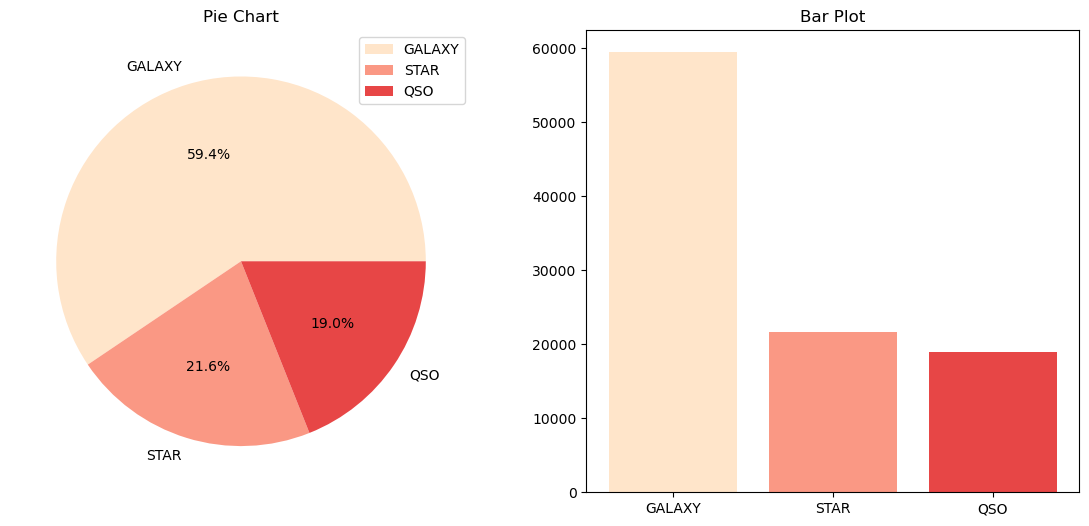

In [7]:
plot_dist(df)

In [8]:
df = df[['alpha', 'delta', 'z', 'i', 'u', 'g', 'r', 'redshift', 'class']]

In [9]:
df_copy = df.copy()
df_copy["class"]=[0 if i == "GALAXY" else 1 if i == "STAR" else 2 for i in df_copy["class"]]

corr_p = df_copy.corr(method='pearson')
corr_s = df_copy.corr(method='spearman')

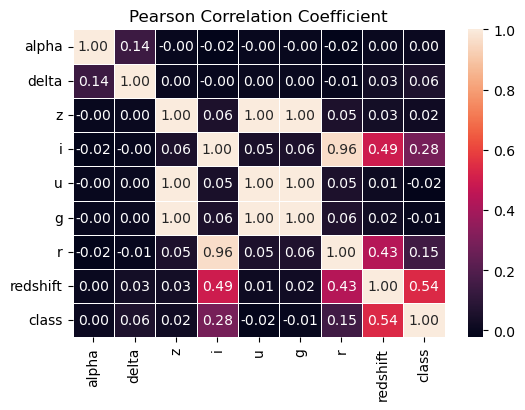

In [10]:
f,ax = plt.subplots(figsize=(6,4))
sns.heatmap(corr_p, annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.title('Pearson Correlation Coefficient')
plt.show()

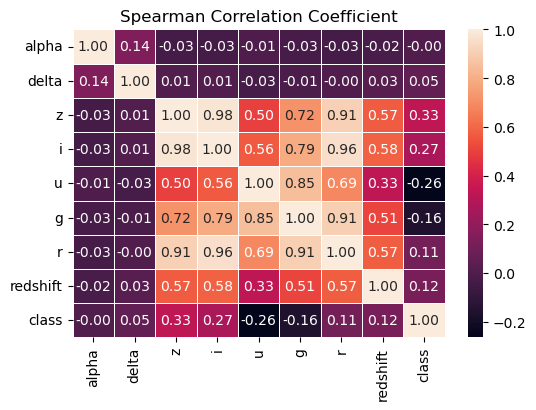

In [11]:
f,ax = plt.subplots(figsize=(6,4))
sns.heatmap(corr_s, annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.title('Spearman Correlation Coefficient')
plt.show()

In [12]:
sorted_corr_p = abs(corr_p["class"]).sort_values(ascending = False)
sorted_corr_p

class       1.000000
redshift    0.536822
i           0.284396
r           0.150691
delta       0.056643
u           0.017701
z           0.017352
g           0.005915
alpha       0.004552
Name: class, dtype: float64

In [13]:
sorted_corr_s = abs(corr_s["class"]).sort_values(ascending = False)
sorted_corr_s

class       1.000000
z           0.329337
i           0.267524
u           0.264597
g           0.160557
redshift    0.122859
r           0.109295
delta       0.054679
alpha       0.000375
Name: class, dtype: float64

In [14]:
#Features used are ['z', 'i', 'u', 'g', 'redshift', 'r', 'class']

df = df.drop(['alpha', 'delta'], axis = 1)

In [15]:
def box_plotter(df, features, target):
    """
    This is funtion helps in plotting the boxplot of data.
    
    Parameters
    ----------
    `df`: dataset
    `features`: columns for analysis
    `target`: target column name
    
    Returns none.
    """
    plt.figure(figsize=(12, 24))
    for (i, feature) in zip(range(len(features)), features):
        plt.subplot(int('{}2{}'.format(len(features), i+1)))
        sns.boxplot(x=target, y=feature, data=df, width=0.6, flierprops={'marker': 'x'}, palette = color_palette)
        plt.title(label='Boxplot of {}'.format(feature), fontsize=10)
        plt.xlabel(xlabel=None)
        plt.ylabel(ylabel=None)
        i += 1
    plt.show()

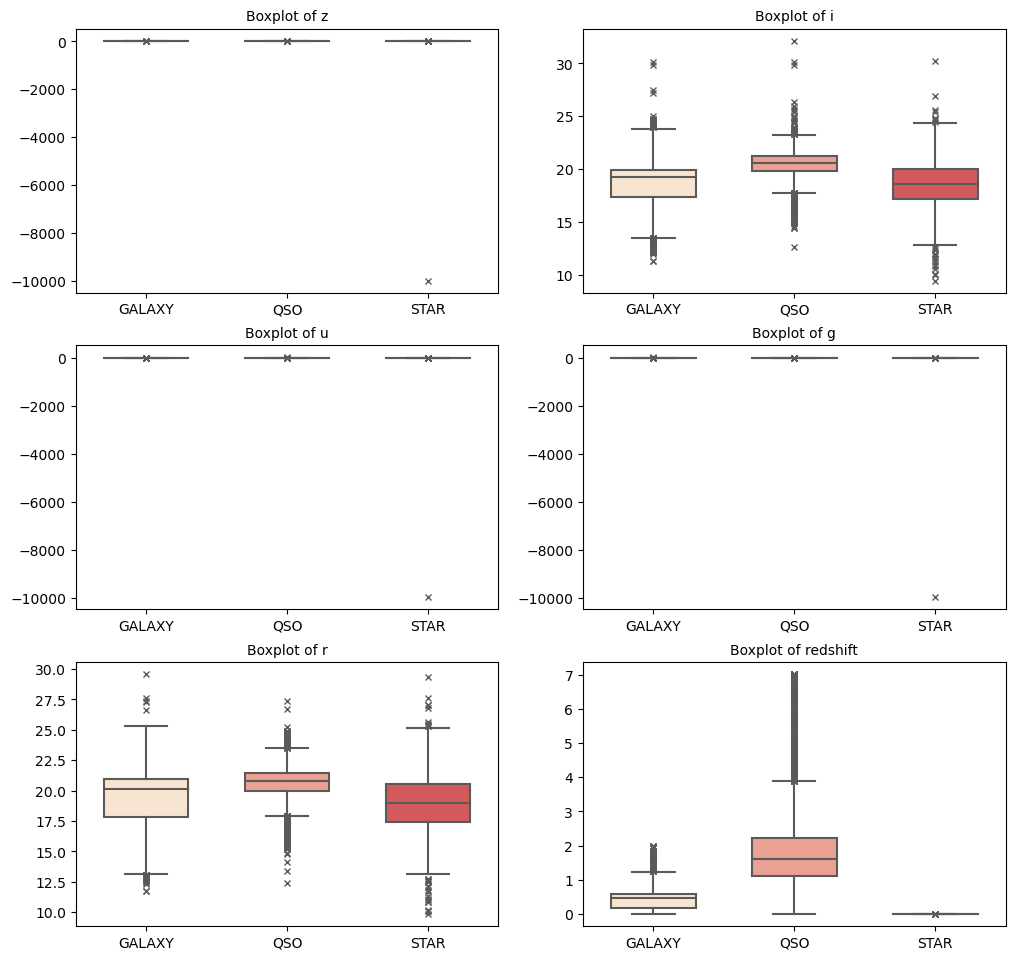

In [16]:
box_plotter(df=df, features=['z', 'i', 'u', 'g', 'r', 'redshift'], target='class')

In [17]:
display(df[df['u'] == min(df['u'])])

,z,i,u,g,r,redshift,class
79543,-9999.0,18.01675,-9999.0,-9999.0,18.1656,0.000089,STAR


In [18]:
display(df[df['g'] == min(df['g'])])

,z,i,u,g,r,redshift,class
79543,-9999.0,18.01675,-9999.0,-9999.0,18.1656,0.000089,STAR


In [19]:
display(df[df['z'] == min(df['z'])])

,z,i,u,g,r,redshift,class
79543,-9999.0,18.01675,-9999.0,-9999.0,18.1656,0.000089,STAR


In [20]:
df = df.drop(index=[79543])
print("The shape of the dataset: {}".format(df.shape))

The shape of the dataset: (99999, 7)


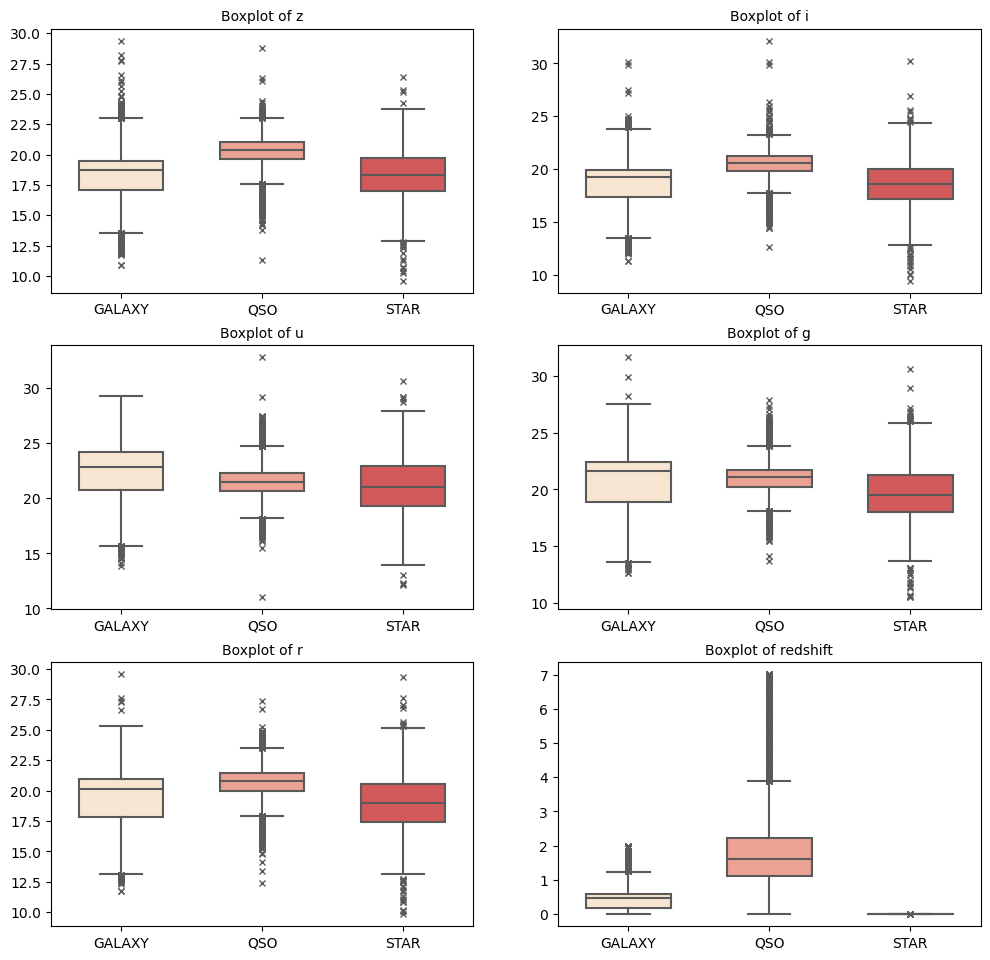

In [21]:
box_plotter(df=df, features=['z', 'i', 'u', 'g', 'r', 'redshift'], target='class')

In [22]:
cols = df.columns.values
cols = np.delete(cols, np.where(cols == 'class'))
cols

array(['z', 'i', 'u', 'g', 'r', 'redshift'], dtype=object)

In [23]:
for i in cols:
  for j in df['class'].unique():
    temp_df = df[i][df['class'] == j]
    #IQR
    Q1 = np.percentile(temp_df, 25, method = 'midpoint')
    Q3 = np.percentile(temp_df, 75, method = 'midpoint')
    IQR = Q3 - Q1

    # Above Upper bound
    upper=Q3+1.5*IQR
    upper_array=temp_df.iloc[np.where(temp_df >= upper)].index

    #Below Lower bound
    lower=Q1-1.5*IQR
    lower_array=temp_df.iloc[np.where(temp_df <= lower)].index

    df = df.drop(index=lower_array)
    df = df.drop(index=upper_array)

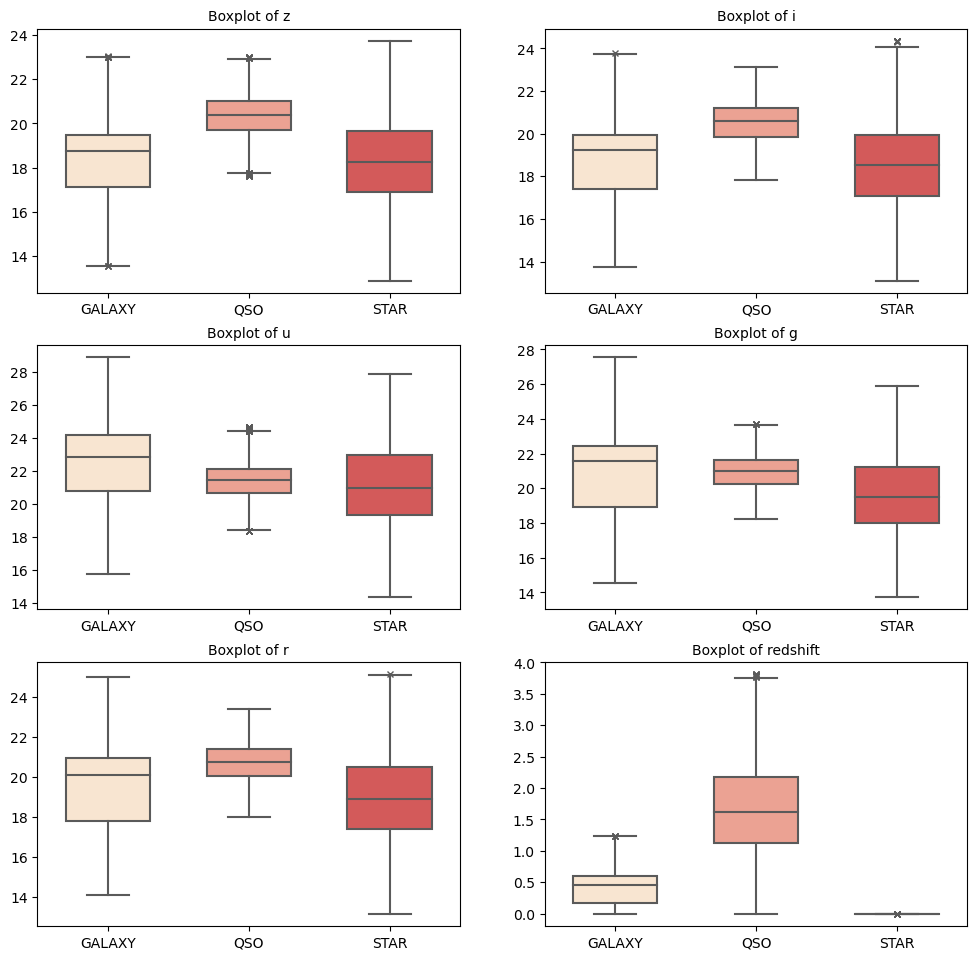

In [24]:
box_plotter(df=df, features=['z', 'i', 'u', 'g', 'r', 'redshift'], target='class')

In [25]:
df.shape

(96186, 7)

In [26]:
def pdf_plotter(df, features, target):
    """
    This is funtion helps in plotting the pdf of data.
    
    Parameters
    ----------
    `df`: dataset
    `features`: columns for analysis
    `target`: target column name
    
    Returns none.
    """
    plt.figure(figsize=(20, 35))
    for (i, feature) in zip(range(len(features)), features):
        plt.subplot(int('{}3{}'.format(len(features), i+1)))
        sns.kdeplot(data=df, x=feature, hue=target, fill=True, palette = color_palette)
        plt.title(label='PDF of {}'.format(feature), fontsize=11)
        plt.xlabel(xlabel='{}'.format(feature))
        plt.grid()
        i += 1
    plt.show()

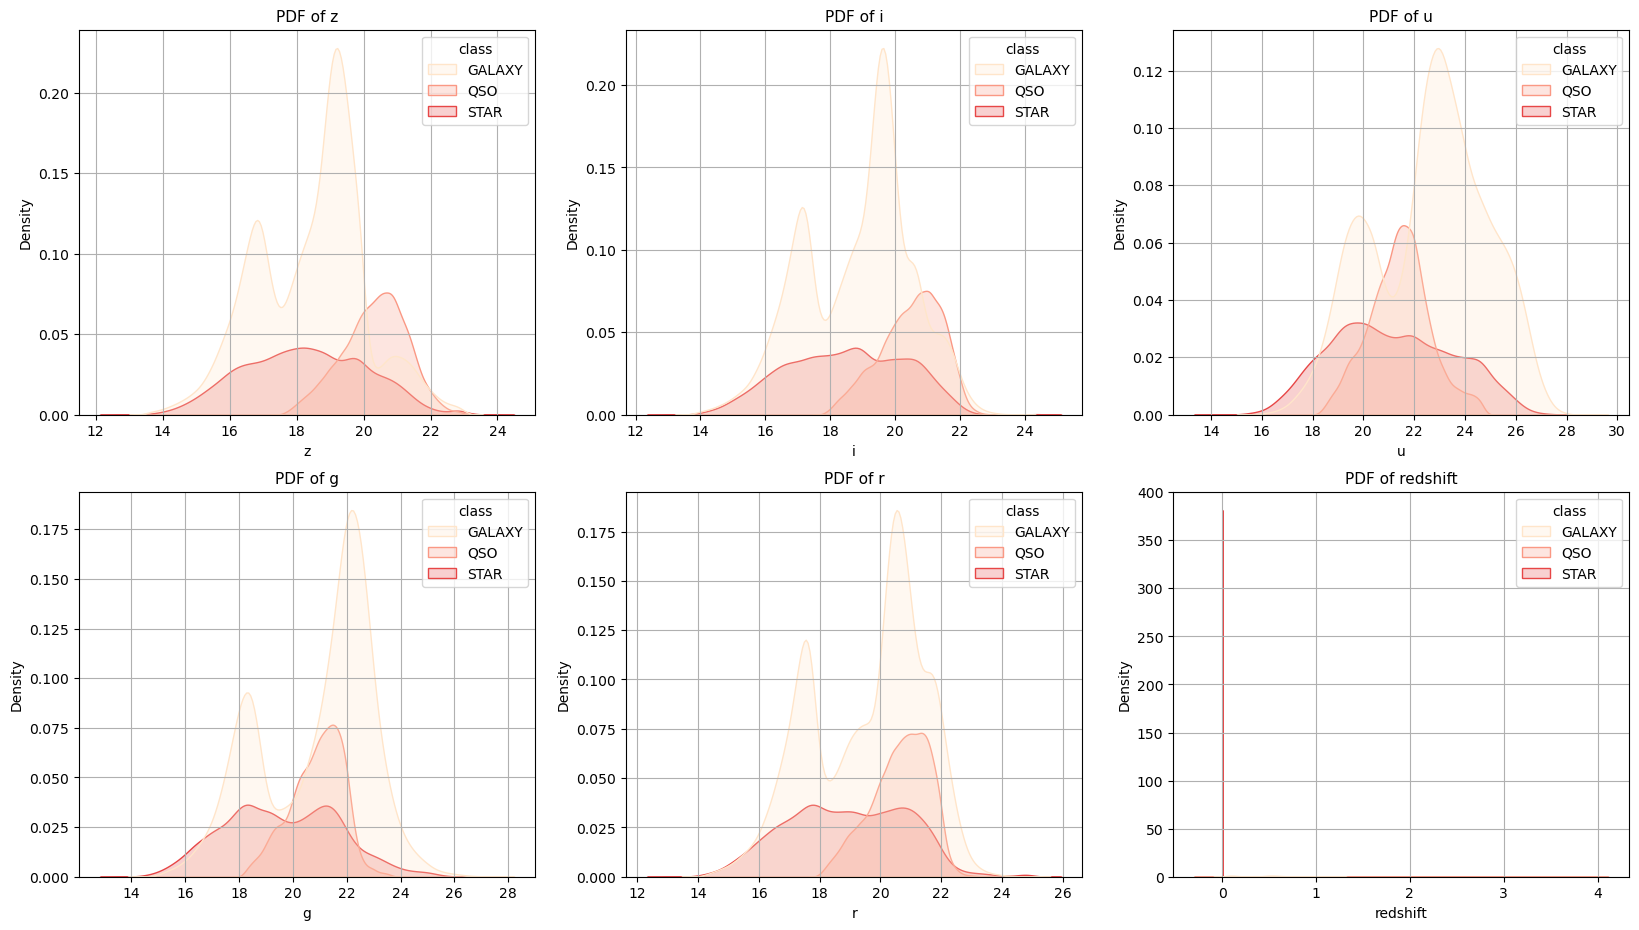

In [27]:
pdf_plotter(df=df, features=['z', 'i', 'u', 'g', 'r', 'redshift'], target='class')

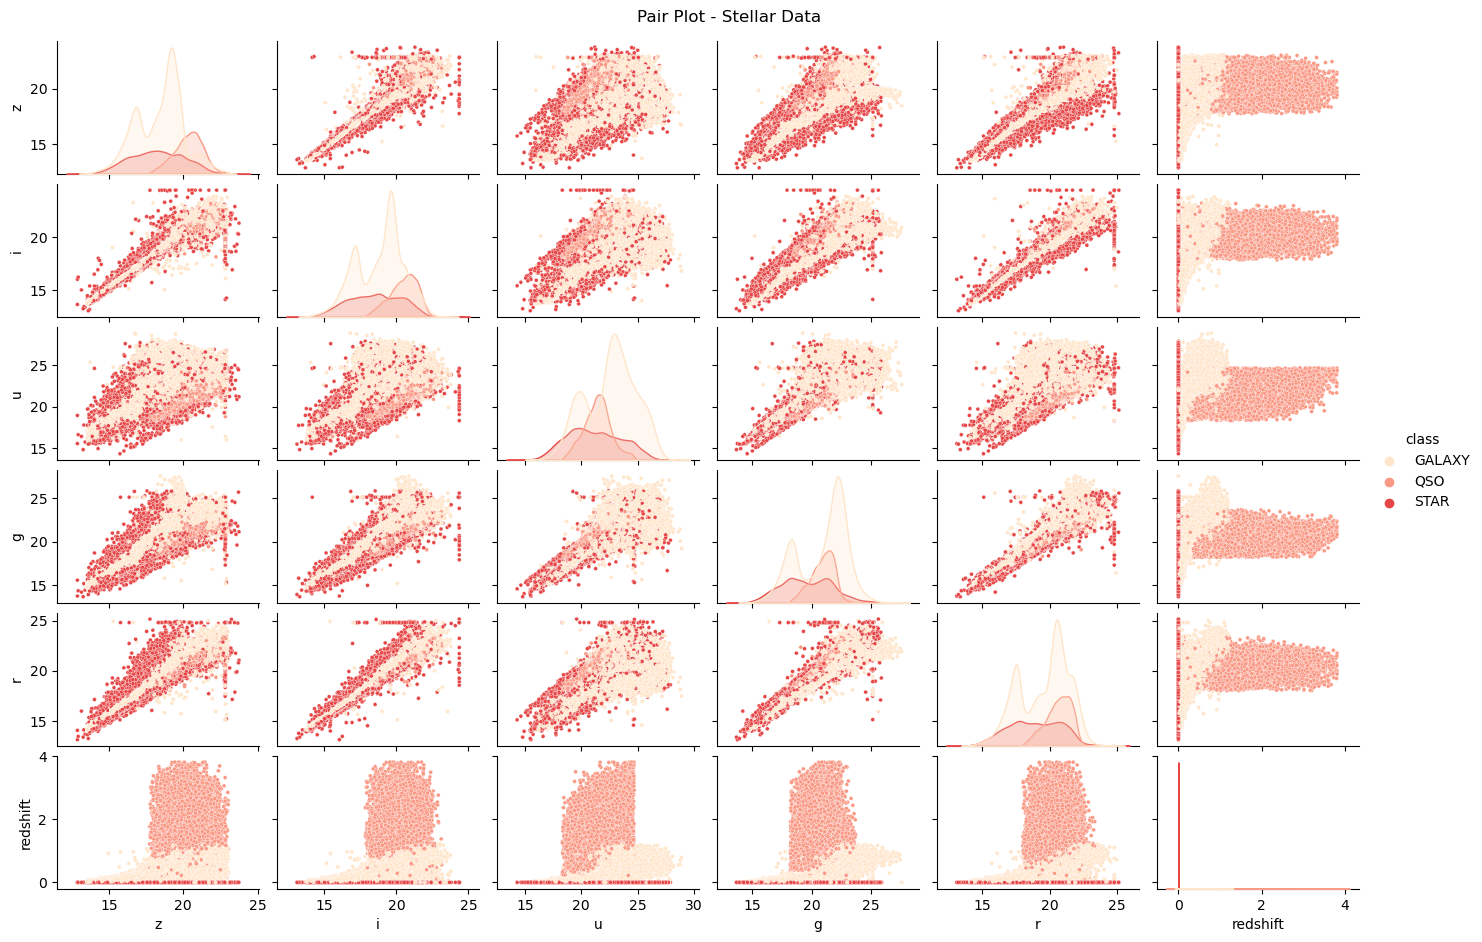

In [27]:
g = sns.pairplot(data=df[['z', 'i', 'u', 'g', 'r', 'redshift', 'class']], hue='class', palette = color_palette, plot_kws={'s': 8})
g.fig.set_size_inches(15, 9)
g.fig.suptitle(t='Pair Plot - Stellar Data', y=1.02)
plt.show()

In [28]:
x = df.drop(['class'], axis = 1)
y = df.loc[:,'class'].values

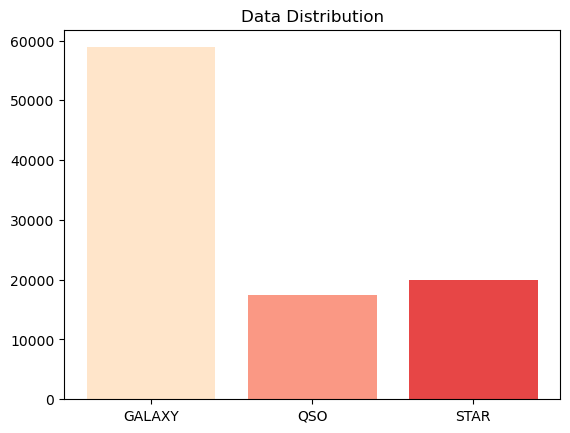

In [29]:
_, cnt = np.unique(y, return_counts=True)
plt.bar(x = ['GALAXY','QSO','STAR'], height = cnt, color = color_palette)
plt.title('Data Distribution')
plt.show()

In [30]:
cnt

array([58869, 17371, 19946], dtype=int64)

In [31]:
sm = SMOTE(random_state=42)
x, y = sm.fit_resample(x, y)

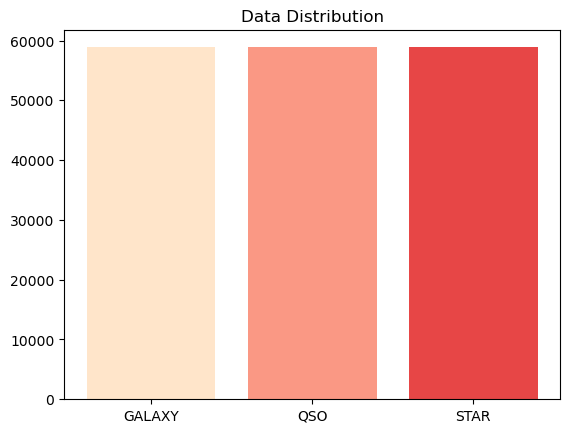

In [32]:
_, cnt = np.unique(y, return_counts=True)
plt.bar(x = ['GALAXY','QSO','STAR'], height = cnt, color = color_palette)
plt.title('Data Distribution')
plt.show()

In [36]:
cnt

array([58869, 58869, 58869], dtype=int64)

In [34]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 2)

Random Forest Classifier

In [39]:
r_forest = RandomForestClassifier(random_state = 2)
rf_fit = r_forest.fit(x_train,y_train)
predicted = r_forest.predict(x_test)
score = r_forest.score(x_test, y_test)
rf_score_ = np.mean(score)

In [38]:
print('Accuracy : %.3f' % (rf_score_*100))

Accuracy : 98.693


In [46]:
print(classification_report(y_test, predicted, digits= 4))

              precision    recall  f1-score   support

      GALAXY     0.9752    0.9858    0.9804     14673
         QSO     0.9869    0.9754    0.9811     14756
        STAR     0.9988    0.9997    0.9992     14723

    accuracy                         0.9869     44152
   macro avg     0.9870    0.9869    0.9869     44152
weighted avg     0.9870    0.9869    0.9869     44152



In [36]:
r_forest_cm = confusion_matrix(y_test, predicted)
r_forest_cm

array([[14464,   191,    18],
       [  363, 14393,     0],
       [    5,     0, 14718]], dtype=int64)

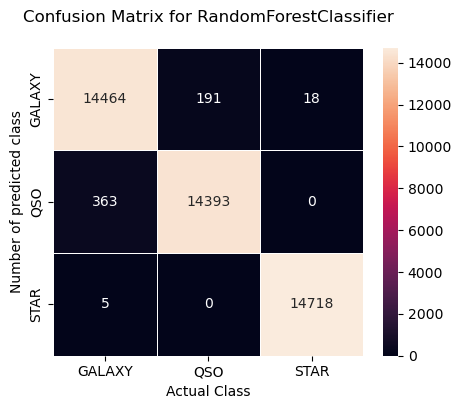

In [37]:
f,ax = plt.subplots(figsize=(5,4))
sns.heatmap(r_forest_cm, annot=True, linewidths=0.5, fmt= '.0f', xticklabels=['GALAXY','QSO','STAR'], yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel("Actual Class")
plt.ylabel("Number of predicted class")
plt.title("Confusion Matrix for RandomForestClassifier\n")
plt.show()

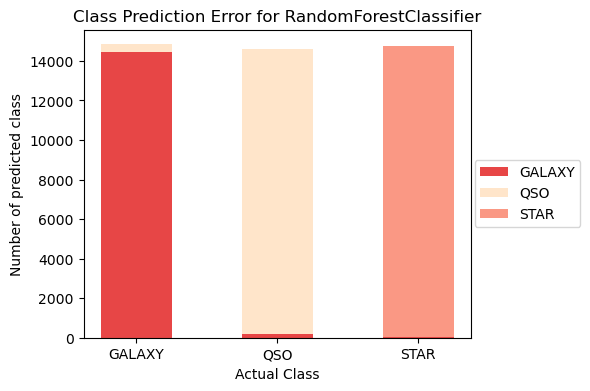

In [38]:
plt.subplots(figsize=(5,4))
plt.bar(x = ['GALAXY','QSO','STAR'], height = r_forest_cm[0, :], color='#E74646', width = 0.5)
plt.bar(x = ['GALAXY','QSO','STAR'], height = r_forest_cm[1, :], bottom= r_forest_cm[0, :], color='#FFE5CA', width = 0.5)
plt.bar(x = ['GALAXY','QSO','STAR'], height = r_forest_cm[2, :], bottom= r_forest_cm[0, :] + r_forest_cm[1, :], color='#FA9884', width = 0.5)
plt.legend(['GALAXY','QSO','STAR'], loc='best', bbox_to_anchor=(0.8, 0.1, 0.5, 0.5))
plt.xlabel("Actual Class")
plt.ylabel("Number of predicted class")
plt.title("Class Prediction Error for RandomForestClassifier")
plt.show()